# Example of Mammalian Hodgkin and Huxley neuron model

Import som useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import necessary modules

In [2]:
import sys
sys.path.insert(0, "../Scripts")

import stim_util as su
from neuron import MHH
from simulation import Simulation

#### Create a simulation environment

In [3]:
mySim = Simulation(period=1500, fs=100)

**Period**: Period of time we would liek to run the simulation for. Unit = millisecond

**fs**: Sampling frequency of our simulation - it defines the time step of our simulaiton as well

#### Create a stimulation signal

In [4]:
I_stim = 1.2 * su.gen_pulse(init_time=400, on_width=300, off_width=200, time_points=mySim.t)

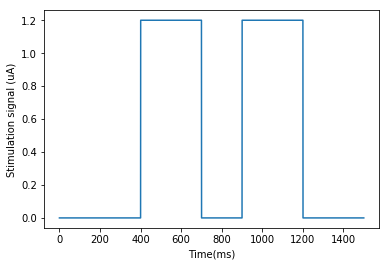

In [5]:
fig, ax = plt.subplots()
ax.plot(mySim.t, I_stim)
plt.xlabel('Time(ms)')
plt.ylabel('Stimulation signal (uA)')
plt.show()

#### Create a neuron

Define the constant parameters (during the simulation) of the neuron model

In [6]:
const_params = {
    # variable = value xxx Unit
    'gNA': 240, # m.mho/cm^2
    'gK': 36, # m.mho/cm^2
    'gA': 61, # m.mho/cm^2
    'gL': 0.068, # m.mho/cm^2
    'ENA': 64.7, # mV
    'EK': -95.2, # mV
    'EL': -51.3, # mV
    'C': 1, # uF/cm^2
    'Er': -71,
    'g_L': 10000,
    'L': 1
}

Define the changing parameters of the neuron model

In [7]:
# Na channel: m, h
# delayed-rectifier K current: n
# slow non-inactivating K current: p, a, 
tracked_params = ['m', 'h', 'n', 'p', 'a', 'b', 
                  'u', 'b', 'INA', 'IK', 'IA', 'I_L']

In [8]:
myNeuron = MHH(const_params=const_params,
               tracked_params=tracked_params,
               time_points=mySim.t)

#### Run the simulation

Add the neuron model and the stimulation signal to your simulation object

In [9]:
mySim.neuron = myNeuron
mySim.stim = I_stim

Now you can run the simulation

In [10]:
mySim.run()

#### Visualize the reponse

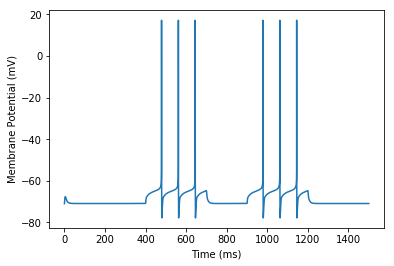

In [11]:
fig, ax = plt.subplots()
ax.plot(mySim.t, myNeuron.u)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()